In [1]:
from google.colab import files
uploaded=files.upload()

Saving Elon_musk.csv to Elon_musk.csv


In [2]:
import pandas as pd
import numpy as np
import nltk

In [3]:
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping grammars/basque_grammars.zip.
[nltk_data]    | Downloading package bcp47 to /root/nltk_data...
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   U

True

In [11]:
df= pd.read_csv('Elon_musk.csv',encoding='latin-1')
df

,Unnamed: 0,Text
0,1,@kunalb11 Im an alien
1,2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,3,@joerogan @Spotify Great interview!
3,4,@gtera27 Doge is underestimated
4,5,@teslacn Congratulations Tesla China for amazi...
...,...,...
1994,1995,"@flcnhvy True, it sounds so surreal, but the n..."
1995,1996,@PPathole Make sure to read ur terms &amp; con...
1996,1997,@TeslaGong @PPathole Samwise Gamgee
1997,1998,@PPathole Altho Dumb and Dumber is <U+0001F525...


In [6]:
!pip install spacy

In [7]:
!pip install wordcloud

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
!python -m spacy download en_core_web_sm

2023-12-10 06:55:03.883702: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-12-10 06:55:03.883773: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-12-10 06:55:03.883842: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-12-10 06:55:03.895970: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-12-10 06:55:04.905709: W tensorflow/compiler/

In [12]:
df= [i.strip() for i in df.Text]  # remove the spaces in the paragraph
df = [Text for Text in df if Text] ## remove the spaces between the paragraph
df

['@kunalb11 I\x92m an alien',
 '@ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it?',
 '@joerogan @Spotify Great interview!',
 '@gtera27 Doge is underestimated',
 '@teslacn Congratulations Tesla China for amazing execution last year. Now on to the next for even more!!',
 'Happy New Year of the Ox! https://t.co/9WFKMYu2oj',
 'Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all. https://t.co/zGxJFDzzrM',
 '@OwenSparks_ @flcnhvy @anonyx10 Haha thanks :)',
 '@flcnhvy @anonyx10 Indeed! Tweets definitely do not represent real-world time allocation.',
 'The most entertaining outcome is the most likely',
 '@GiveDirectly Just sent some',
 'Just agree to do Clubhouse with @kanyewest',
 'https://t.co/3rWE9uHSTS',
 '@geoffkeighley @UnrealEngine It\x92s getting real',
 'Bought some Dogecoin for lil X, so he can be a toddler hodler',
 '@JoshManMode He definitely has issues, but the sentencing seems a bit high',
 '@freewalletorg Thanks for fixing',

In [25]:
text= ' '.join(df)
text

'@kunalb11 I\x92m an alien @ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it? @joerogan @Spotify Great interview! @gtera27 Doge is underestimated @teslacn Congratulations Tesla China for amazing execution last year. Now on to the next for even more!! Happy New Year of the Ox! https://t.co/9WFKMYu2oj Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all. https://t.co/zGxJFDzzrM @OwenSparks_ @flcnhvy @anonyx10 Haha thanks :) @flcnhvy @anonyx10 Indeed! Tweets definitely do not represent real-world time allocation. The most entertaining outcome is the most likely @GiveDirectly Just sent some Just agree to do Clubhouse with @kanyewest https://t.co/3rWE9uHSTS @geoffkeighley @UnrealEngine It\x92s getting real Bought some Dogecoin for lil X, so he can be a toddler hodler @JoshManMode He definitely has issues, but the sentencing seems a bit high @freewalletorg Thanks for fixing @freewalletorg Please unlock my account @AstroJordy <U+0001F923><U

In [26]:
df

['@kunalb11 I\x92m an alien',
 '@ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it?',
 '@joerogan @Spotify Great interview!',
 '@gtera27 Doge is underestimated',
 '@teslacn Congratulations Tesla China for amazing execution last year. Now on to the next for even more!!',
 'Happy New Year of the Ox! https://t.co/9WFKMYu2oj',
 'Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all. https://t.co/zGxJFDzzrM',
 '@OwenSparks_ @flcnhvy @anonyx10 Haha thanks :)',
 '@flcnhvy @anonyx10 Indeed! Tweets definitely do not represent real-world time allocation.',
 'The most entertaining outcome is the most likely',
 '@GiveDirectly Just sent some',
 'Just agree to do Clubhouse with @kanyewest',
 'https://t.co/3rWE9uHSTS',
 '@geoffkeighley @UnrealEngine It\x92s getting real',
 'Bought some Dogecoin for lil X, so he can be a toddler hodler',
 '@JoshManMode He definitely has issues, but the sentencing seems a bit high',
 '@freewalletorg Thanks for fixing',

In [27]:
import string
no_punc_text = text.translate(str.maketrans("\x92", "'", string.punctuation))
no_punc_text

"kunalb11 I'm an alien IDAACarmack Ray tracing on Cyberpunk with HDR is nextlevel Have you tried it joerogan Spotify Great interview gtera27 Doge is underestimated teslacn Congratulations Tesla China for amazing execution last year Now on to the next for even more Happy New Year of the Ox httpstco9WFKMYu2oj Frodo was the underdoge\nAll thought he would fail\nHimself most of all httpstcozGxJFDzzrM OwenSparks flcnhvy anonyx10 Haha thanks  flcnhvy anonyx10 Indeed Tweets definitely do not represent realworld time allocation The most entertaining outcome is the most likely GiveDirectly Just sent some Just agree to do Clubhouse with kanyewest httpstco3rWE9uHSTS geoffkeighley UnrealEngine It's getting real Bought some Dogecoin for lil X so he can be a toddler hodler JoshManMode He definitely has issues but the sentencing seems a bit high freewalletorg Thanks for fixing freewalletorg Please unlock my account AstroJordy U0001F923U0001F923 This is true power haha httpstcoFc9uhQSd7O freewalletorg

In [28]:
#Tokenization
from nltk.tokenize import word_tokenize

text_tokens = word_tokenize(no_punc_text)
text_tokens

['kunalb11',
 'I',
 "'m",
 'an',
 'alien',
 'IDAACarmack',
 'Ray',
 'tracing',
 'on',
 'Cyberpunk',
 'with',
 'HDR',
 'is',
 'nextlevel',
 'Have',
 'you',
 'tried',
 'it',
 'joerogan',
 'Spotify',
 'Great',
 'interview',
 'gtera27',
 'Doge',
 'is',
 'underestimated',
 'teslacn',
 'Congratulations',
 'Tesla',
 'China',
 'for',
 'amazing',
 'execution',
 'last',
 'year',
 'Now',
 'on',
 'to',
 'the',
 'next',
 'for',
 'even',
 'more',
 'Happy',
 'New',
 'Year',
 'of',
 'the',
 'Ox',
 'httpstco9WFKMYu2oj',
 'Frodo',
 'was',
 'the',
 'underdoge',
 'All',
 'thought',
 'he',
 'would',
 'fail',
 'Himself',
 'most',
 'of',
 'all',
 'httpstcozGxJFDzzrM',
 'OwenSparks',
 'flcnhvy',
 'anonyx10',
 'Haha',
 'thanks',
 'flcnhvy',
 'anonyx10',
 'Indeed',
 'Tweets',
 'definitely',
 'do',
 'not',
 'represent',
 'realworld',
 'time',
 'allocation',
 'The',
 'most',
 'entertaining',
 'outcome',
 'is',
 'the',
 'most',
 'likely',
 'GiveDirectly',
 'Just',
 'sent',
 'some',
 'Just',
 'agree',
 'to',
 'do',

In [32]:
from nltk.corpus import stopwords

In [33]:
my_stop_words = stopwords.words('english')
my_stop_words

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [34]:
no_stop_tokens = [word for word in text_tokens if not word in my_stop_words]
print(no_stop_tokens)

['kunalb11', 'I', "'m", 'alien', 'IDAACarmack', 'Ray', 'tracing', 'Cyberpunk', 'HDR', 'nextlevel', 'Have', 'tried', 'joerogan', 'Spotify', 'Great', 'interview', 'gtera27', 'Doge', 'underestimated', 'teslacn', 'Congratulations', 'Tesla', 'China', 'amazing', 'execution', 'last', 'year', 'Now', 'next', 'even', 'Happy', 'New', 'Year', 'Ox', 'httpstco9WFKMYu2oj', 'Frodo', 'underdoge', 'All', 'thought', 'would', 'fail', 'Himself', 'httpstcozGxJFDzzrM', 'OwenSparks', 'flcnhvy', 'anonyx10', 'Haha', 'thanks', 'flcnhvy', 'anonyx10', 'Indeed', 'Tweets', 'definitely', 'represent', 'realworld', 'time', 'allocation', 'The', 'entertaining', 'outcome', 'likely', 'GiveDirectly', 'Just', 'sent', 'Just', 'agree', 'Clubhouse', 'kanyewest', 'httpstco3rWE9uHSTS', 'geoffkeighley', 'UnrealEngine', 'It', "'s", 'getting', 'real', 'Bought', 'Dogecoin', 'lil', 'X', 'toddler', 'hodler', 'JoshManMode', 'He', 'definitely', 'issues', 'sentencing', 'seems', 'bit', 'high', 'freewalletorg', 'Thanks', 'fixing', 'freewall

In [35]:
#Noramalize the data
lower_words = [x.lower() for x in no_stop_tokens]
print(lower_words)

['kunalb11', 'i', "'m", 'alien', 'idaacarmack', 'ray', 'tracing', 'cyberpunk', 'hdr', 'nextlevel', 'have', 'tried', 'joerogan', 'spotify', 'great', 'interview', 'gtera27', 'doge', 'underestimated', 'teslacn', 'congratulations', 'tesla', 'china', 'amazing', 'execution', 'last', 'year', 'now', 'next', 'even', 'happy', 'new', 'year', 'ox', 'httpstco9wfkmyu2oj', 'frodo', 'underdoge', 'all', 'thought', 'would', 'fail', 'himself', 'httpstcozgxjfdzzrm', 'owensparks', 'flcnhvy', 'anonyx10', 'haha', 'thanks', 'flcnhvy', 'anonyx10', 'indeed', 'tweets', 'definitely', 'represent', 'realworld', 'time', 'allocation', 'the', 'entertaining', 'outcome', 'likely', 'givedirectly', 'just', 'sent', 'just', 'agree', 'clubhouse', 'kanyewest', 'httpstco3rwe9uhsts', 'geoffkeighley', 'unrealengine', 'it', "'s", 'getting', 'real', 'bought', 'dogecoin', 'lil', 'x', 'toddler', 'hodler', 'joshmanmode', 'he', 'definitely', 'issues', 'sentencing', 'seems', 'bit', 'high', 'freewalletorg', 'thanks', 'fixing', 'freewall

In [36]:
#Stemming
from nltk.stem import PorterStemmer
ps = PorterStemmer()
stemmed_tokens = [ps.stem(word) for word in lower_words]
print(stemmed_tokens)

['kunalb11', 'i', "'m", 'alien', 'idaacarmack', 'ray', 'trace', 'cyberpunk', 'hdr', 'nextlevel', 'have', 'tri', 'joerogan', 'spotifi', 'great', 'interview', 'gtera27', 'doge', 'underestim', 'teslacn', 'congratul', 'tesla', 'china', 'amaz', 'execut', 'last', 'year', 'now', 'next', 'even', 'happi', 'new', 'year', 'ox', 'httpstco9wfkmyu2oj', 'frodo', 'underdog', 'all', 'thought', 'would', 'fail', 'himself', 'httpstcozgxjfdzzrm', 'owenspark', 'flcnhvi', 'anonyx10', 'haha', 'thank', 'flcnhvi', 'anonyx10', 'inde', 'tweet', 'definit', 'repres', 'realworld', 'time', 'alloc', 'the', 'entertain', 'outcom', 'like', 'givedirectli', 'just', 'sent', 'just', 'agre', 'clubhous', 'kanyewest', 'httpstco3rwe9uhst', 'geoffkeighley', 'unrealengin', 'it', "'s", 'get', 'real', 'bought', 'dogecoin', 'lil', 'x', 'toddler', 'hodler', 'joshmanmod', 'he', 'definit', 'issu', 'sentenc', 'seem', 'bit', 'high', 'freewalletorg', 'thank', 'fix', 'freewalletorg', 'pleas', 'unlock', 'account', 'astrojordi', 'u0001f923u00

In [37]:
# NLP english language model of spacy library
nlp = spacy.load('en_core_web_sm')

In [38]:
doc = nlp(' '.join(no_stop_tokens))
print(doc)

kunalb11 I 'm alien IDAACarmack Ray tracing Cyberpunk HDR nextlevel Have tried joerogan Spotify Great interview gtera27 Doge underestimated teslacn Congratulations Tesla China amazing execution last year Now next even Happy New Year Ox httpstco9WFKMYu2oj Frodo underdoge All thought would fail Himself httpstcozGxJFDzzrM OwenSparks flcnhvy anonyx10 Haha thanks flcnhvy anonyx10 Indeed Tweets definitely represent realworld time allocation The entertaining outcome likely GiveDirectly Just sent Just agree Clubhouse kanyewest httpstco3rWE9uHSTS geoffkeighley UnrealEngine It 's getting real Bought Dogecoin lil X toddler hodler JoshManMode He definitely issues sentencing seems bit high freewalletorg Thanks fixing freewalletorg Please unlock account AstroJordy U0001F923U0001F923 This true power haha httpstcoFc9uhQSd7O freewalletorg Any crypto wallet wo n't give private keys avoided costs freewalletorg Your app sucks RT SpaceX NASA selected Falcon Heavy launch first two elements lunar Gateway tog

In [39]:
lemmas = [token.lemma_ for token in doc]
print(lemmas)

['kunalb11', 'I', "'", 'm', 'alien', 'IDAACarmack', 'Ray', 'trace', 'Cyberpunk', 'HDR', 'nextlevel', 'have', 'try', 'joerogan', 'spotify', 'great', 'interview', 'gtera27', 'Doge', 'underestimate', 'teslacn', 'Congratulations', 'Tesla', 'China', 'amazing', 'execution', 'last', 'year', 'now', 'next', 'even', 'Happy', 'New', 'Year', 'Ox', 'httpstco9wfkmyu2oj', 'Frodo', 'underdoge', 'all', 'thought', 'would', 'fail', 'himself', 'httpstcozgxjfdzzrm', 'OwenSparks', 'flcnhvy', 'anonyx10', 'Haha', 'thanks', 'flcnhvy', 'anonyx10', 'Indeed', 'Tweets', 'definitely', 'represent', 'realworld', 'time', 'allocation', 'the', 'entertaining', 'outcome', 'likely', 'GiveDirectly', 'just', 'send', 'just', 'agree', 'Clubhouse', 'kanyewest', 'httpstco3rWE9uHSTS', 'geoffkeighley', 'UnrealEngine', 'it', 'be', 'get', 'real', 'buy', 'Dogecoin', 'lil', 'x', 'toddler', 'hodler', 'JoshManMode', 'he', 'definitely', 'issue', 'sentencing', 'seem', 'bit', 'high', 'freewalletorg', 'thank', 'fix', 'freewalletorg', 'pleas

In [40]:
for token in doc:
  print(token.text,token.pos_,token.lemma_,spacy.explain(token.pos_),token.is_alpha,token.is_stop,token.tag_)

Streaming output truncated to the last 5000 lines.
TheeSpaceDude NOUN theespacedude noun True False NN
Over ADP over adposition True True IN
time NOUN time noun True False NN
outer ADJ outer adjective True False JJ
20 NUM 20 numeral False False CD
3 NUM 3 numeral False False CD
httpstco5z9P2upkqs PROPN httpstco5z9P2upkqs proper noun False False NNP
SpceEnthusiast PROPN SpceEnthusiast proper noun True False NNP
tjmurphymit NOUN tjmurphymit noun True False NN
thesheetztweetz VERB thesheetztweetz verb True False VBD
ExploreMars PROPN ExploreMars proper noun True False NNP
SpaceX PROPN SpaceX proper noun True False NNP
TheeSpaceDude NOUN theespacedude noun True False NN
Yeah INTJ yeah interjection True False UH
AlertAlarms NOUN alertalarm noun True False NNS
Just ADV just adverb True True RB
go VERB go verb True True VBP
resonant NOUN resonant noun True False NN
modes NOUN mode noun True False NNS
fast ADV fast adverb True False RB
It PRON it pronoun True True PRP
's AUX be auxiliary False

In [41]:
spacy.displacy.render(doc, style='ent',jupyter=True)

In [42]:
noun_verbs= [token.text for token in doc if token.pos_ in ['NOUN','VERB','ADJ']]
print(noun_verbs)

["'", 'm', 'alien', 'tracing', 'nextlevel', 'tried', 'Spotify', 'Great', 'interview', 'gtera27', 'underestimated', 'teslacn', 'amazing', 'execution', 'last', 'year', 'httpstco9WFKMYu2oj', 'underdoge', 'thought', 'fail', 'httpstcozGxJFDzzrM', 'represent', 'realworld', 'time', 'allocation', 'entertaining', 'outcome', 'sent', 'agree', 'getting', 'real', 'Bought', 'lil', 'X', 'toddler', 'hodler', 'issues', 'sentencing', 'seems', 'bit', 'high', 'freewalletorg', 'Thanks', 'fixing', 'freewalletorg', 'unlock', 'account', 'true', 'power', 'haha', 'freewalletorg', 'crypto', 'wallet', 'give', 'private', 'keys', 'avoided', 'costs', 'freewalletorg', 'app', 'sucks', 'selected', 'launch', 'first', 'elements', 'lunar', 'mission', 'predict', 'cash', 'flow', 'difficult', 'technical', 'amp', 'economic', 'endeavor', 'needs', 'pass', 'deep', 'chasm', 'negative', 'cash', 'flow', 'next', 'year', 'Lowest', 'cost', 'ton', 'carbon', 'sequestered', 'net', 'value', 'product', 'made', 'scalable', 'g', 'meant', 'pr

In [43]:
from sklearn.feature_extraction.text import CountVectorizer

In [44]:
ct= CountVectorizer()

In [45]:
x= ct.fit_transform(noun_verbs)

In [46]:
print(ct.get_feature_names_out())

['130pm' '140pm' '1st' ... 'zeroes' 'zeros' 'zip2']


In [49]:
x.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [50]:
two_array= np.arange(0,12).reshape(3,4)
two_array

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [51]:
sum= two_array.sum(axis=0)
sum


array([12, 15, 18, 21])

In [52]:
sum_x= x.sum(axis=0)
sum_x.shape

(1, 3335)

In [53]:
print(ct.vocabulary_.items())

dict_items([('alien', 90), ('tracing', 3045), ('nextlevel', 1986), ('tried', 3064), ('spotify', 2760), ('great', 1117), ('interview', 1568), ('gtera27', 1127), ('underestimated', 3139), ('teslacn', 2947), ('amazing', 107), ('execution', 881), ('last', 1662), ('year', 3325), ('httpstco9wfkmyu2oj', 1273), ('underdoge', 3138), ('thought', 2986), ('fail', 913), ('httpstcozgxjfdzzrm', 1448), ('represent', 2423), ('realworld', 2374), ('time', 2997), ('allocation', 94), ('entertaining', 846), ('outcome', 2077), ('sent', 2592), ('agree', 76), ('getting', 1077), ('real', 2367), ('bought', 322), ('lil', 1719), ('toddler', 3015), ('hodler', 1209), ('issues', 1584), ('sentencing', 2593), ('seems', 2576), ('bit', 286), ('high', 1197), ('freewalletorg', 1023), ('thanks', 2964), ('fixing', 977), ('unlock', 3163), ('account', 43), ('true', 3072), ('power', 2232), ('haha', 1138), ('crypto', 613), ('wallet', 3233), ('give', 1086), ('private', 2263), ('keys', 1631), ('avoided', 213), ('costs', 581), ('ap

In [54]:
for i,j in ct.vocabulary_.items():
  print(i,sum_x[0,j])

alien 1
tracing 1
nextlevel 2
tried 6
spotify 1
great 65
interview 3
gtera27 1
underestimated 1
teslacn 2
amazing 9
execution 1
last 10
year 28
httpstco9wfkmyu2oj 1
underdoge 1
thought 7
fail 2
httpstcozgxjfdzzrm 1
represent 1
realworld 1
time 20
allocation 3
entertaining 3
outcome 3
sent 2
agree 6
getting 7
real 8
bought 3
lil 1
toddler 1
hodler 1
issues 3
sentencing 1
seems 8
bit 8
high 27
freewalletorg 4
thanks 14
fixing 1
unlock 1
account 1
true 30
power 8
haha 16
crypto 3
wallet 1
give 7
private 2
keys 1
avoided 1
costs 2
app 1
sucks 2
selected 1
launch 41
first 31
elements 1
lunar 1
mission 23
predict 3
cash 3
flow 4
difficult 3
technical 2
amp 109
economic 2
endeavor 1
needs 9
pass 4
deep 5
chasm 1
negative 4
next 24
lowest 2
cost 10
ton 1
carbon 4
sequestered 1
net 3
value 4
product 9
made 13
scalable 1
meant 4
price 6
countries 2
difference 6
taxes 1
shipping 1
tobyliiiiiiiiii 13
intended 1
ideas 2
apply 3
team 12
manage 1
capture 2
prize 2
receives 1
stock 7
comp 3
stockoptio

In [55]:
word_freq= [(word,sum_x[0,idf]) for word,idf in ct.vocabulary_.items()]
word_freq= sorted(word_freq, reverse=True,key= lambda x:x[1] )
word_df= pd.DataFrame(word_freq, columns=['word','count'])
word_df.head()

,word,count
0,amp,109
1,great,65
2,flcnhvy,47
3,good,43
4,launch,41


<Axes: title={'center': 'Top Repeated words'}, xlabel='word'>

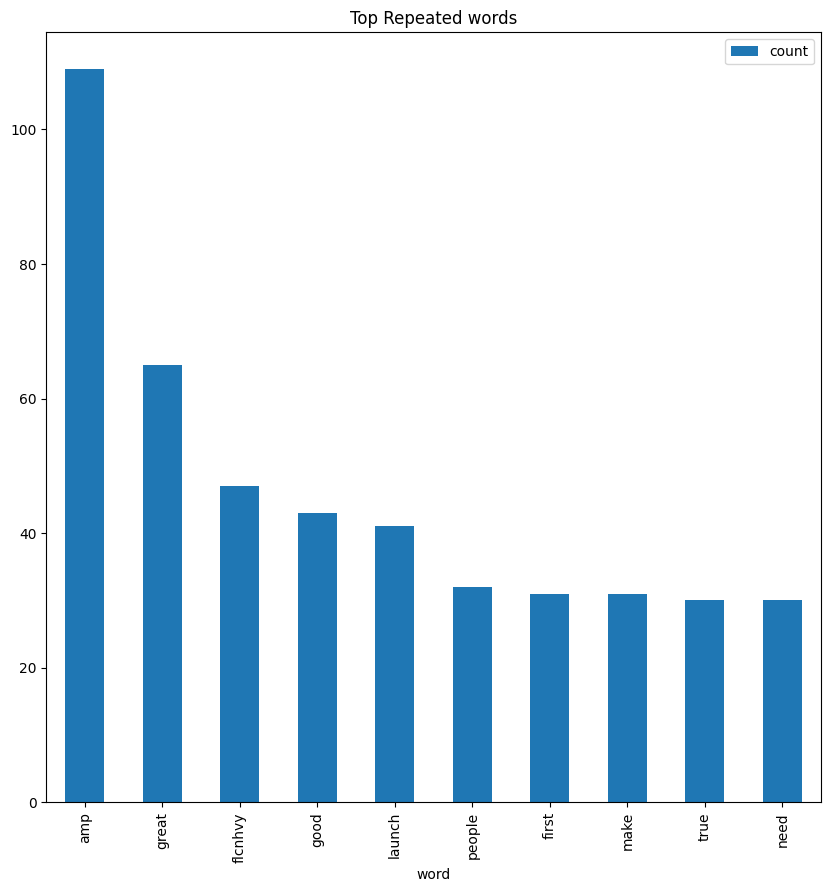

In [56]:
word_df[0:10].plot(kind='bar',x='word',title= 'Top Repeated words',figsize=(10,10))

Emotion mining


In [58]:
from nltk.tokenize import word_tokenize,sent_tokenize

In [60]:
sentence= sent_tokenize(text)
sentence

['@kunalb11 I\x92m an alien @ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level.',
 'Have you tried it?',
 '@joerogan @Spotify Great interview!',
 '@gtera27 Doge is underestimated @teslacn Congratulations Tesla China for amazing execution last year.',
 'Now on to the next for even more!!',
 'Happy New Year of the Ox!',
 'https://t.co/9WFKMYu2oj Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all.',
 'https://t.co/zGxJFDzzrM @OwenSparks_ @flcnhvy @anonyx10 Haha thanks :) @flcnhvy @anonyx10 Indeed!',
 'Tweets definitely do not represent real-world time allocation.',
 'The most entertaining outcome is the most likely @GiveDirectly Just sent some Just agree to do Clubhouse with @kanyewest https://t.co/3rWE9uHSTS @geoffkeighley @UnrealEngine It\x92s getting real Bought some Dogecoin for lil X, so he can be a toddler hodler @JoshManMode He definitely has issues, but the sentencing seems a bit high @freewalletorg Thanks for fixing @freewalletorg Please unlock 

In [61]:
sent_df= pd.DataFrame(sentence,columns=['sentence'])
sent_df

,sentence
0,@kunalb11 Im an alien @ID_AA_Carmack Ray trac...
1,Have you tried it?
2,@joerogan @Spotify Great interview!
3,@gtera27 Doge is underestimated @teslacn Congr...
4,Now on to the next for even more!!
...,...
922,"@kenyanwalstreet Not actually a payout, just a..."
923,"It may never pay out, as the stock cant b ht..."
924,Details Aug 28.
925,AI symbiosis while u wait @vistacruiser7 @flcn...


In [64]:
from google.colab import files
uploaded= files.upload()

Saving Afinn.csv to Afinn.csv


In [65]:
aff= pd.read_csv('Afinn.csv',encoding='latin-1')
aff

,word,value
0,abandon,-2
1,abandoned,-2
2,abandons,-2
3,abducted,-2
4,abduction,-2
...,...,...
2472,yucky,-2
2473,yummy,3
2474,zealot,-2
2475,zealots,-2


In [66]:
aff_dict= aff.set_index('word')['value'].to_dict()

In [67]:
aff_dict

{'abandon': -2,
 'abandoned': -2,
 'abandons': -2,
 'abducted': -2,
 'abduction': -2,
 'abductions': -2,
 'abhor': -3,
 'abhorred': -3,
 'abhorrent': -3,
 'abhors': -3,
 'abilities': 2,
 'ability': 2,
 'aboard': 1,
 'absentee': -1,
 'absentees': -1,
 'absolve': 2,
 'absolved': 2,
 'absolves': 2,
 'absolving': 2,
 'absorbed': 1,
 'abuse': -3,
 'abused': -3,
 'abuses': -3,
 'abusive': -3,
 'accept': 1,
 'accepted': 1,
 'accepting': 1,
 'accepts': 1,
 'accident': -2,
 'accidental': -2,
 'accidentally': -2,
 'accidents': -2,
 'accomplish': 2,
 'accomplished': 2,
 'accomplishes': 2,
 'accusation': -2,
 'accusations': -2,
 'accuse': -2,
 'accused': -2,
 'accuses': -2,
 'accusing': -2,
 'ache': -2,
 'achievable': 1,
 'aching': -2,
 'acquit': 2,
 'acquits': 2,
 'acquitted': 2,
 'acquitting': 2,
 'acrimonious': -3,
 'active': 1,
 'adequate': 1,
 'admire': 3,
 'admired': 3,
 'admires': 3,
 'admiring': 3,
 'admit': -1,
 'admits': -1,
 'admitted': -1,
 'admonish': -2,
 'admonished': -2,
 'adopt': 

In [68]:
def sentiment_count(text:str):
  sent_value=0
  if text:
    sentence= nlp(text)
    for token in sentence:
      sent_value+= aff_dict.get(token.lemma_,0)
    return sent_value

In [69]:
sent_df['sentiment_value'] = sent_df['sentence'].apply(sentiment_count)

In [70]:
sent_df


,sentence,sentiment_value
0,@kunalb11 Im an alien @ID_AA_Carmack Ray trac...,0
1,Have you tried it?,0
2,@joerogan @Spotify Great interview!,3
3,@gtera27 Doge is underestimated @teslacn Congr...,3
4,Now on to the next for even more!!,0
...,...,...
922,"@kenyanwalstreet Not actually a payout, just a...",0
923,"It may never pay out, as the stock cant b ht...",-4
924,Details Aug 28.,0
925,AI symbiosis while u wait @vistacruiser7 @flcn...,-2


In [71]:
sent_df['word_count']= sent_df['sentence'].str.split().apply(len)
sent_df

,sentence,sentiment_value,word_count
0,@kunalb11 Im an alien @ID_AA_Carmack Ray trac...,0,13
1,Have you tried it?,0,4
2,@joerogan @Spotify Great interview!,3,4
3,@gtera27 Doge is underestimated @teslacn Congr...,3,13
4,Now on to the next for even more!!,0,8
...,...,...,...
922,"@kenyanwalstreet Not actually a payout, just a...",0,11
923,"It may never pay out, as the stock cant b ht...",-4,31
924,Details Aug 28.,0,3
925,AI symbiosis while u wait @vistacruiser7 @flcn...,-2,47


In [72]:
sent_df['index']= range(0,len(sent_df))
sent_df

,sentence,sentiment_value,word_count,index
0,@kunalb11 Im an alien @ID_AA_Carmack Ray trac...,0,13,0
1,Have you tried it?,0,4,1
2,@joerogan @Spotify Great interview!,3,4,2
3,@gtera27 Doge is underestimated @teslacn Congr...,3,13,3
4,Now on to the next for even more!!,0,8,4
...,...,...,...,...
922,"@kenyanwalstreet Not actually a payout, just a...",0,11,922
923,"It may never pay out, as the stock cant b ht...",-4,31,923
924,Details Aug 28.,0,3,924
925,AI symbiosis while u wait @vistacruiser7 @flcn...,-2,47,925


<Axes: title={'center': 'Sentiments'}, xlabel='index', ylabel='sentiment_value'>

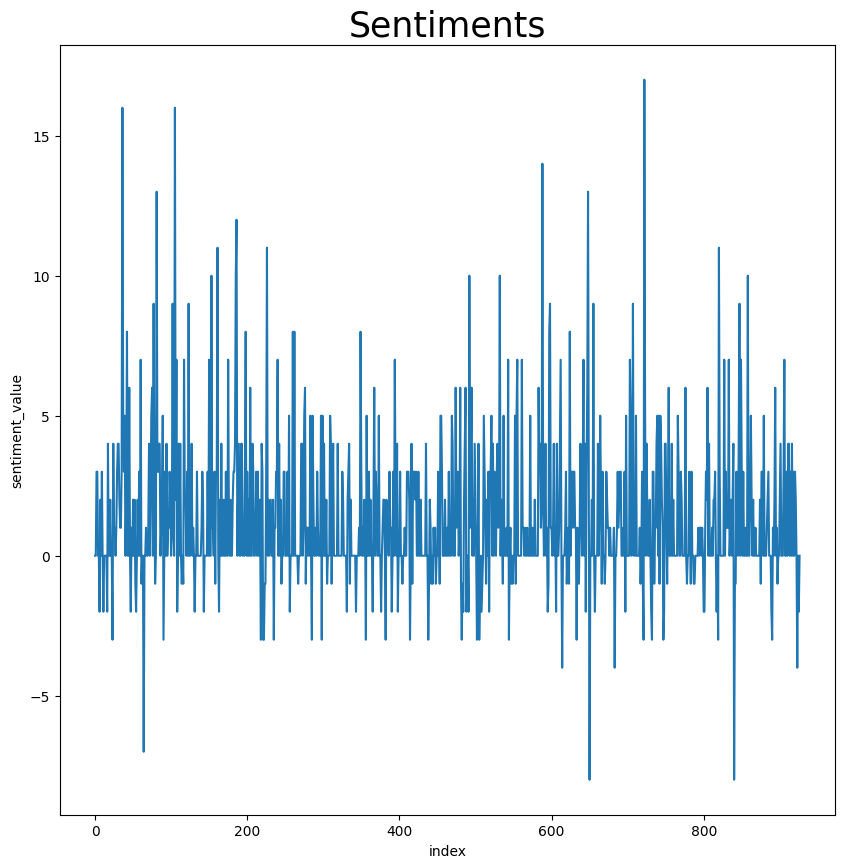

In [73]:
plt.figure(figsize=(10,10))
plt.title('Sentiments',size=25)
sns.lineplot(data=sent_df,x='index',y='sentiment_value')

<ipython-input-74-7fb7d4378b5e>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(sent_df['sentiment_value'])


<Axes: xlabel='sentiment_value', ylabel='Density'>

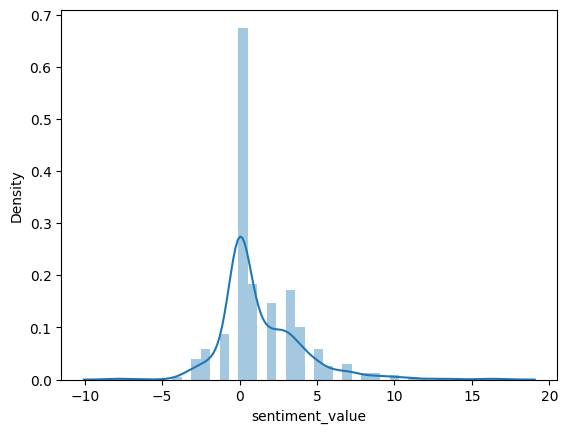

In [74]:
sns.distplot(sent_df['sentiment_value'])

In [75]:
a=sent_df[sent_df['sentiment_value']==0]
a

,sentence,sentiment_value,word_count,index
0,@kunalb11 Im an alien @ID_AA_Carmack Ray trac...,0,13,0
1,Have you tried it?,0,4,1
4,Now on to the next for even more!!,0,8,4
5,Happy New Year of the Ox!,0,6,5
8,Tweets definitely do not represent real-world ...,0,8,8
...,...,...,...,...
917,That is a revolution in automotive body engine...,0,9,917
919,@PPathole @IheartTesla For sure.,0,4,919
922,"@kenyanwalstreet Not actually a payout, just a...",0,11,922
924,Details Aug 28.,0,3,924


In [76]:
sent_df.sort_values(by='sentiment_value',ascending=False)

,sentence,sentiment_value,word_count,index
722,We just havent observed the https://t.co/mez...,17,72,722
36,"@ajtourville @Erdayastronaut @SpaceX Yes, but ...",16,231,36
105,@Erdayastronaut @SpaceX Was also thinking that...,16,94,105
588,The open areas https://t.co/rabjKrtQlw @Sav...,14,138,588
81,@teslaownersSV This is a good one @MrBeastYT I...,13,38,81
...,...,...,...,...
923,"It may never pay out, as the stock cant b ht...",-4,31,923
683,"Occasional flights from land are ok, but frequ...",-4,39,683
64,"Also, the road to hell is mostly paved with ba...",-7,11,64
840,Cool Model 3 review by @iamjamiefoxx https://t...,-8,61,840


In [77]:
import wordcloud

In [78]:
from wordcloud import WordCloud

In [79]:
def visualization(wordcloud):
  plt.figure(figsize=(10,10))
  plt.imshow(wordcloud)
  plt.axis('off')

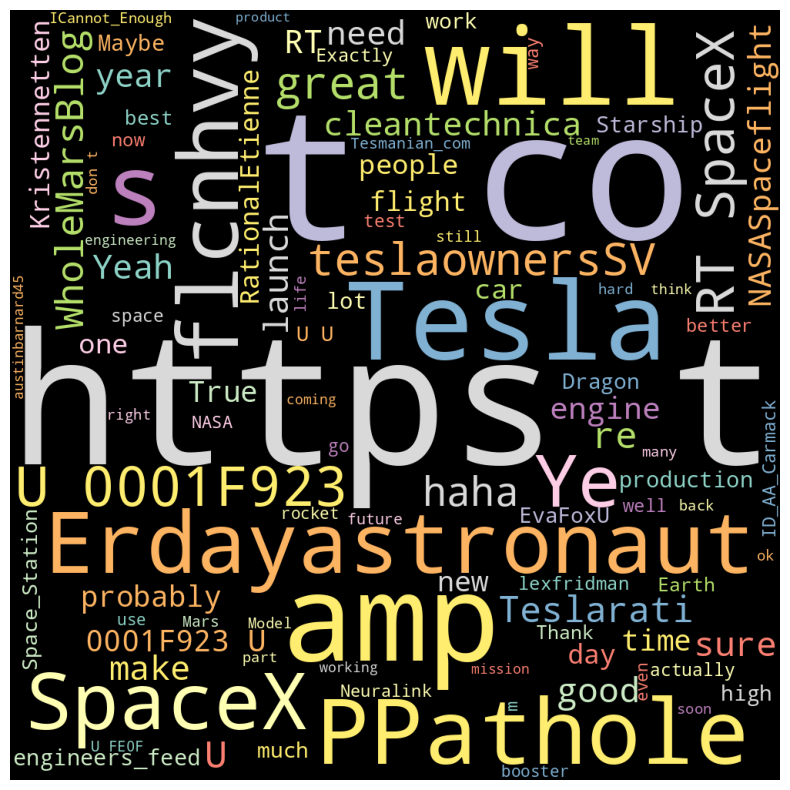

In [80]:
wordcloud= WordCloud(width=1000,height=1000,background_color='black',max_words=100, colormap='Set3').generate(text)
visualization(wordcloud)